In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/hla_types/clean/TCGA.ClassII.conservative.csv', index_col=0)

In [3]:
df.head()

,DPA1_allele1,DPA1_allele2,DPB1_allele1,DPB1_allele2,DQA1_allele1,DQA1_allele2,DQB1_allele1,DQB1_allele2,DRB1_allele1,DRB1_allele2
TCGA-02-0003,DPA10103,DPA10103,DPB10402,DPB10201,DQA10102,DQA10303,DQB10602,DQB10301,DRB1_1501,DRB1_0401
TCGA-02-0033,DPA10103,DPA10103,DPB10402,DPB10402,DQA10505,DQA10301,DQB10302,DQB10301,DRB1_1104,DRB1_0404
TCGA-02-0047,DPA10103,DPA10103,DPB10402,DPB11501,DQA10301,DQA10501,DQB10201,DQB10302,DRB1_0301,DRB1_0401
TCGA-02-0055,DPA10103,DPA10103,DPB10402,DPB10401,DQA10505,DQA10301,DQB10301,DQB10301,DRB1_1101,DRB1_0407
TCGA-02-2466,DPA10103,DPA10103,DPB10201,DPB10401,DQA10501,DQA10101,DQB10501,DQB10201,DRB1_0301,DRB1_0101


In [4]:
combined_df = pd.DataFrame({'DPA': [x.strip() for x in list(df.DPA1_allele1) + list(df.DPA1_allele2)],
                            'DPB': [x.strip() for x in list(df.DPB1_allele1) + list(df.DPB1_allele2)],
                            'DQA': [x.strip() for x in list(df.DQA1_allele2) + list(df.DQA1_allele2)],
                            'DQB': [x.strip() for x in list(df.DQB1_allele2) + list(df.DQB1_allele2)],
                            'DRB': [x.strip() for x in list(df.DRB1_allele2) + list(df.DRB1_allele2)]})

In [5]:
combined_df = combined_df.replace('-', np.nan).dropna()

In [6]:
for gene in ['DPA', 'DPB', 'DQA', 'DQB', 'DRB']:
    print gene, len(combined_df[gene].unique())

DPA 14
DPB 53
DQA 22
DQB 25
DRB 74


In [7]:
def remove_hyph(x):
    if '_' in x:
        return x.split('_')[0] + x.split('_')[1]
    else:
        return x

     allele  frequency
0  DPA10103   0.759017
1  DPA10201   0.149777
2  DPA10202   0.071657
3  DPA10104   0.007341
4  DPA10301   0.004389
     allele  frequency
0  DPB10401   0.381424
1  DPB10201   0.141478
2  DPB10402   0.111475
3  DPB10301   0.073811
4  DPB10101   0.064475
     allele  frequency
0  DQA10102   0.181615
1  DQA10301   0.173795
2  DQA10101   0.145069
3  DQA10103   0.109480
4  DQA10303   0.104692
     allele  frequency
0  DQB10301   0.309129
1  DQB10201   0.142036
2  DQB10302   0.133578
3  DQB10202   0.116342
4  DQB10501   0.078998
     allele  frequency
0  DRB10701   0.196297
1  DRB10101   0.104373
2  DRB10401   0.102458
3  DRB10301   0.099745
4  DRB11101   0.045803


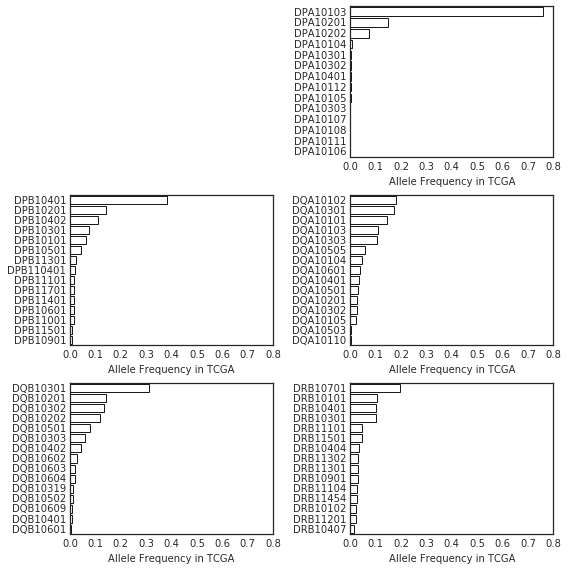

In [8]:
# organize in a grid
fig = plt.figure(figsize=(8, 8)) 

for gene, x, y in zip(['DPA', 'DPB', 'DQA', 'DQB', 'DRB'], [0, 1, 1, 2, 2], [1, 0, 1, 0, 1]):
    ax2 = plt.subplot2grid((3, 2), (x, y), rowspan=1)
    df_A = pd.DataFrame(combined_df[gene].value_counts()/len(combined_df)).reset_index()[:15]
    df_A.columns = ['allele', 'frequency']
    df_A.allele = df_A.allele.apply(remove_hyph)
    print df_A.head()
    sns.set_color_codes("muted")
    sns.barplot(x="frequency", y="allele", data=df_A,
                label="Total", color="white")
    plt.xlabel('Allele Frequency in TCGA')
    plt.ylabel('')
    plt.xlim(0, 0.8)
    plt.tight_layout()

    
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/hla_typing/all_alleles.pdf')
